Separando os pacotes

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

Lendo os dados.

In [50]:
inflação = pd.read_csv('inf.csv', decimal = ',', sep = ';') ### usando o argumento decimal, podemos ler csv em latim.
taxa = pd.read_csv('taxa.csv', decimal = ',', sep = ';')
selic = pd.read_csv('selic.csv', decimal = ',', sep = ';')

Verificando arquivos

In [51]:
inflação

,inf
0,0.79
1,0.77
2,0.47
3,0.15
4,0.16
...,...
115,0.86
116,0.89
117,1.35
118,0.25


In [52]:
selic

,selic
0,0.92
1,0.84
2,0.99
3,0.96
4,0.97
...,...
115,0.16
116,0.15
117,0.16
118,0.15


In [53]:
taxa

,taxa
0,2.62
1,2.66
2,2.65
3,2.63
4,2.65
...,...
115,1.80
116,1.79
117,1.75
118,1.83


In [54]:
inflação['data'] = pd.date_range(start='03/01/2011', periods=len(inflação), freq='M') ### acrescentando uma coluna de datas.

In [55]:
inflação

,inf,data
0,0.79,2011-03-31
1,0.77,2011-04-30
2,0.47,2011-05-31
3,0.15,2011-06-30
4,0.16,2011-07-31
...,...,...
115,0.86,2020-10-31
116,0.89,2020-11-30
117,1.35,2020-12-31
118,0.25,2021-01-31


In [56]:
inflação.dtypes ### verficando os tipos de dados do data frame inflação.

inf            float64
data    datetime64[ns]
dtype: object

Criando uma nova coluna com os juros reais

In [57]:
inflação['Juros_reais'] = selic.selic - inflação.inf

In [58]:
inflação.head()

,inf,data,Juros_reais
0,0.79,2011-03-31,0.13
1,0.77,2011-04-30,0.07
2,0.47,2011-05-31,0.52
3,0.15,2011-06-30,0.81
4,0.16,2011-07-31,0.81


Plotando gráfico

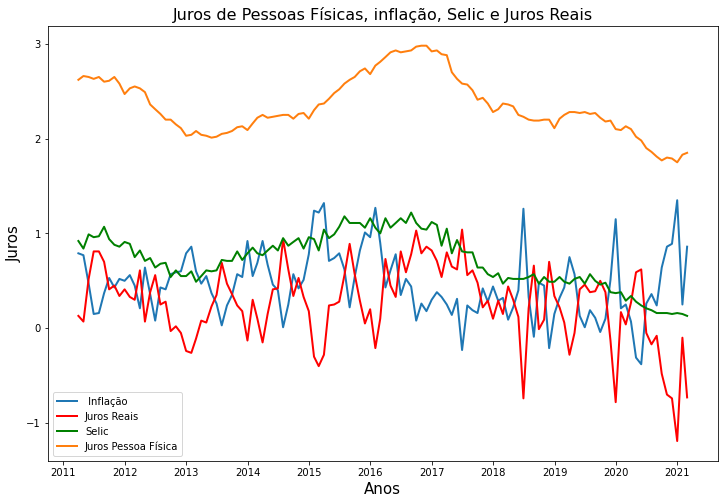

In [62]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Juros de Pessoas Físicas, inflação, Selic e Juros Reais',fontsize = 16)
plt.plot(inflação.data,inflação.inf,lw =2, label = ' Inflação')
plt.plot(inflação.data,inflação.Juros_reais,lw =2, label = 'Juros Reais', c = 'r')
plt.plot(inflação.data,selic.selic, lw = 2,label = 'Selic',c = 'g')
plt.plot(inflação.data,taxa.taxa,lw =2, label = 'Juros Pessoa Física',ls ='solid')
plt.ylabel("Juros",fontsize = 15)
plt.xlabel('Anos',fontsize = 15)
plt.legend(loc = 'lower left')
plt.savefig('jurosreais.pdf') ### salvando a figura em PDF.